<a href="https://colab.research.google.com/github/siddhi5386/Emotion-Recognition-from-brain-EEG-signals-/blob/master/Emotion_recognition_from_brain_signals_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-a_5y_d23
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-a_5y_d23
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28123 sha256=9abd7b9e8c9a7da579c1ece88a14979b702af56fcb53a2d0b0a98c940d06d56d
  Stored in directory: /tmp/pip-ephem-wheel-cache-xb9_4lxk/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg


In [ ]:
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# data_preprocessed_python
os.getcwd()
os.chdir('/content/drive/MyDrive')

In [ ]:
channel = [1,2,3,4,5,6,11,13,17,19,20,21,22,23,25,29,31] #14 Channels chosen to fit Emotiv Epoch+
band = [4,8,12,16,25,45] #5 bands
window_size = 256 #Averaging band power of 2 sec
step_size = 16 #Each 0.125 sec update once
sample_rate = 128 #Sampling rate of 128 Hz
subjectList = ['01','02','03','04','05','06','07','08','09','10']
#List of subjects

In [ ]:
def Discrete_wavelet_transform (sub, channel, band, window_size, step_size, sample_rate):
   
    meta = []
    with open("/content/drive/MyDrive/BTP/data_preprocessed_python/s" + sub + '.dat', 'rb') as file:

        subject = pickle.load(file, encoding='latin1') 
        for i in range (0,40):
            # loop over 0-39 trails

            data = subject["data"][i]
            labels = subject["labels"][i]
            start = 0;
            
            while start + window_size < data.shape[1]:
                meta_array = []
                meta_data = [] 
                for j in channel:
                    Y = []
                    X = data[j][start : start + window_size] 
                    coeffs = pywt.wavedec(X, 'db4', level=6)
      
                    cA6, cD6, cD5,cD4,cD3,cD2,cD1 = coeffs
                    scD3 = np.std(cD3)
                    scD2 = np.std(cD2)
                    scD1 = np.std(cD1)
                    
                    Ent_cD3 = stats.entropy(np.square(cD3))
                    Ent_cD2 = stats.entropy(np.square(cD2))
                    Ent_cD1 = stats.entropy(np.square(cD1))

                    Ene_cD3 = np.sum(np.square(cD3))
                    Ene_cD2 = np.sum(np.square(cD2))
                    Ene_cD1 = np.sum(np.square(cD1))


                    
                    Y = [Ent_cD1, Ent_cD2, Ent_cD3, scD1, scD2, scD3, Ene_cD1, Ene_cD2, Ene_cD3]
                    
                    meta_data = meta_data + list(Y)

                meta_array.append(np.array(meta_data))
                meta_array.append(labels)

                meta.append(np.array(meta_array))    
                start = start + step_size
                
        meta = np.array(meta)
        np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/s' + sub, meta, allow_pickle=True, fix_imports=True)

In [ ]:
for subject in subjectList:
  Discrete_wavelet_transform (subject, channel, band, window_size, step_size, sample_rate)

In [ ]:
data_training = []
label_training = []
data_testing = []
label_testing = []

for i in range(new_total_samples.shape[0]):
  if i%4==0:
    data_testing.append(new_total_samples[i])
    label_testing.append(total_labels[i])
  else:
    data_training.append(new_total_samples[i])
    label_training.append(total_labels[i])

np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/data_training', np.array(data_training), allow_pickle=True, fix_imports=True)
np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/label_training', np.array(label_training), allow_pickle=True, fix_imports=True)
print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)


np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/data_testing', np.array(data_testing), allow_pickle=True, fix_imports=True)
np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/label_testing', np.array(label_testing), allow_pickle=True, fix_imports=True)
print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)

training dataset: (156160, 85) (156160, 4)
testing dataset: (39040, 85) (39040, 4)


In [ ]:
with open('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)
    
with open('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)
    
X = normalize(X)
Z = np.ravel(Y[:, [1]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Domain_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

In [ ]:
X.shape

(156160, 85)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(Z)
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train.shape

(156160, 10)

In [ ]:
x_train = np.array(X[:])

In [ ]:
with open('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)
    
with open('/content/drive/MyDrive/BTP/data_preprocessed_python/Wavelet/label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [1]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Domain_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

In [ ]:
x_test = np.array(M[:])

In [ ]:
from keras.utils import to_categorical #to_categorical is used to convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector
y_test = to_categorical(L)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
x_train.shape

(156160, 85, 1)

In [ ]:
batch_size = 256
num_classes = 10
epochs = 200
input_shape=(x_train.shape[1], 1)

In [ ]:
print(input_shape)

(85, 1)


In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

In [ ]:
model = Sequential()
from keras.layers import LeakyReLU
intput_shape=(x_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation=LeakyReLU(alpha=0.2), input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64,kernel_size=3,padding = 'same', activation=LeakyReLU(alpha=0.2)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation=LeakyReLU(alpha=0.2)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.2))
model.add(Conv1D(32,kernel_size=3,padding = 'same', activation=LeakyReLU(alpha=0.2)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64,kernel_size=3,padding = 'same', activation=LeakyReLU(alpha=0.2)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation=LeakyReLU(alpha=0.2)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 85, 128)           512       
_________________________________________________________________
batch_normalization (BatchNo (None, 85, 128)           512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 42, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 42, 64)            24640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 42, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 21, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 128)           2

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,  
          verbose=1,validation_data=(x_test,y_test))

Epoch 1/200
610/610 [==============================] - 41s 12ms/step - loss: 1.7924 - accuracy: 0.3144 - val_loss: 1.4956 - val_accuracy: 0.4023
Epoch 2/200
610/610 [==============================] - 6s 11ms/step - loss: 1.5047 - accuracy: 0.3996 - val_loss: 1.3597 - val_accuracy: 0.4625
Epoch 3/200
610/610 [==============================] - 6s 11ms/step - loss: 1.4049 - accuracy: 0.4417 - val_loss: 1.2583 - val_accuracy: 0.5032
Epoch 4/200
610/610 [==============================] - 7s 11ms/step - loss: 1.3301 - accuracy: 0.4734 - val_loss: 1.1897 - val_accuracy: 0.5317
Epoch 5/200
610/610 [==============================] - 7s 11ms/step - loss: 1.2663 - accuracy: 0.4979 - val_loss: 1.1382 - val_accuracy: 0.5572
Epoch 6/200
610/610 [==============================] - 7s 11ms/step - loss: 1.2119 - accuracy: 0.5225 - val_loss: 1.0886 - val_accuracy: 0.5744
Epoch 7/200
610/610 [==============================] - 7s 11ms/step - loss: 1.1770 - accuracy: 0.5382 - val_loss: 1.0443 - val_accuracy

In [ ]:
train_score = model.evaluate(x_train, y_train, verbose=1)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

4880/4880 [==============================] - 14s 3ms/step - loss: 0.3766 - accuracy: 0.8776
Train loss: 0.37655529379844666
Train accuracy: 0.8776447176933289


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1220/1220 [==============================] - 3s 3ms/step - loss: 0.4824 - accuracy: 0.8354
Test loss: 0.4823954701423645
Test accuracy: 0.8353739976882935


In [ ]:
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt
import numpy


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


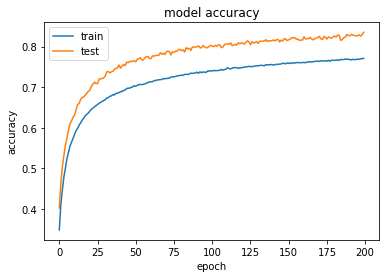

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

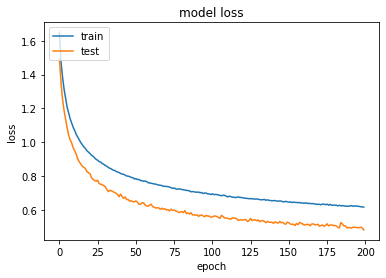

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

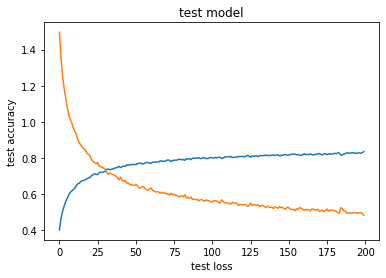

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('test model')
plt.ylabel('test accuracy')
plt.xlabel('test loss')
plt.show()

In [ ]:
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_pred[1]

array([1.1868577e-26, 3.6481311e-11, 3.2125129e-08, 3.7299429e-05,
       7.1350486e-09, 7.7913018e-07, 2.8813430e-08, 9.9995482e-01,
       7.0819106e-06, 1.1770853e-14], dtype=float32)

In [ ]:
y_test1=np.argmax(y_test, axis=1)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
y_test1[1]

7

In [ ]:
y_pred[1]

7

In [ ]:
cmatrix=confusion_matrix(y_test1, y_pred)

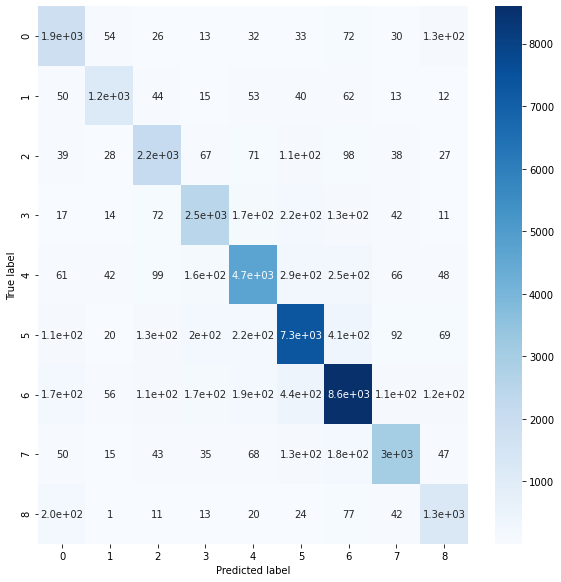

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()